# Final Project Group 29: The Worst Pittsburgh Neighborhood

We would like to figure out what is the worst Pittsburgh neighborhood according two 3 metrics:

* Least number of trees
* Most number of firearms seized
* Most number of fire incidents

First, we will review the data analysis for the trees dataset.

# Least num of Trees:

For this data set, I grouped the data by 'neighborhood' and then summed each point by the 'property_value_benefits_leaf_surface_area' column. This effectively gives you the total surface area of greenery in each neighborhood. From here, I print out the top and bottom amounts of greenery coverage and a map that describes this data. Instead of plotting the raw data, I have plotted a log2 transformation of the data so that it makes the geomap look nicer with the colors.

**Note:** For the map, pink indicates the least surface area of shrubbery which will contribute the most of our total metric. This will be important later when the metrics need to be combined.

neighborhood
South Shore                37.516197
Glen Hazel                107.087953
Hays                      161.862443
Esplen                    167.196270
East Carnegie             467.703262
                           ...      
South Side Flats       115978.844577
Shadyside              127611.494264
Squirrel Hill North    197145.882536
Highland Park          269534.424155
Squirrel Hill South    478016.173112
Name: property_value_benefits_leaf_surface_area, Length: 90, dtype: float64


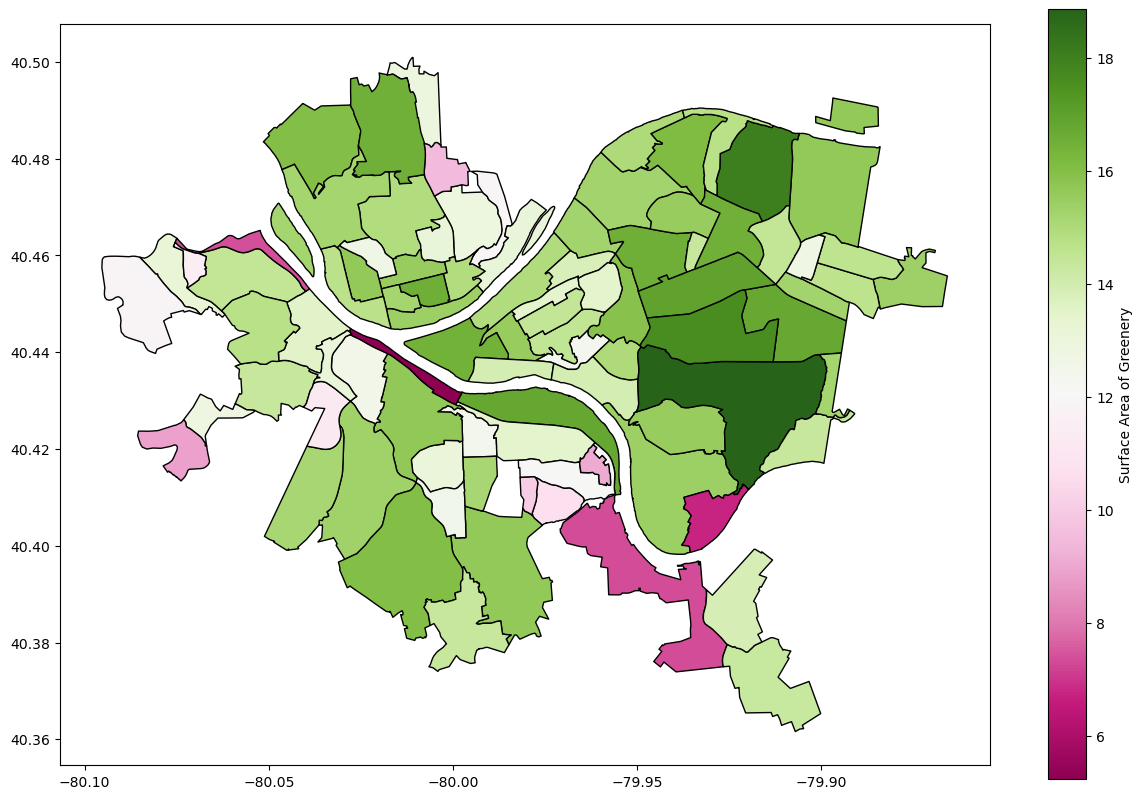

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

# import dataset
trees = pd.read_csv("trees.csv", engine ="python")
# filter to important info
num_trees = trees.groupby("neighborhood").sum()['property_value_benefits_leaf_surface_area']
num_trees.sort_values(ascending=False)
num_treeslog = num_trees.apply(np.log2)

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# do the merge
trees_map = neighborhoods.merge(num_treeslog, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
trees_map[['hood','property_value_benefits_leaf_surface_area','geometry']].head()

# draw a choropleth map using data from the column named "number_of_trees"
trees_map.plot(column='property_value_benefits_leaf_surface_area', # set the data to be used for coloring
               cmap='PiYG',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Surface Area of Greenery"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "black"} # set disctricts with no data to gray
               )

print(num_trees.sort_values(ascending = True))
plt.show()


# Firearm Incidents

For this dataset, I tracked the count of the amount of instances of the neighborhood appearing in the dataset by first grouping the data by 'neighborhood' then counting each instance of that neighborhood. From here, I print out the top and bottom amounts of firearm seizures and a map that describes this data. Instead of plotting the raw data, I have plotted a log2 transformation of the data so that it makes the geomap look nicer with the colors.

The idea behind counting firearms seizures as a negative metric, is that the more illegal firearms in a neighborhood, the more firearm seizures there will be. Gray areas are places with no data.

neighborhood
Swisshelm Park        1
Summer Hill           2
Friendship            3
Regent Square         4
Mt. Oliver            4
                   ... 
Perry South         112
Carrick             117
Homewood North      130
South Side Flats    180
Homewood South      252
Name: _id, Length: 88, dtype: int64


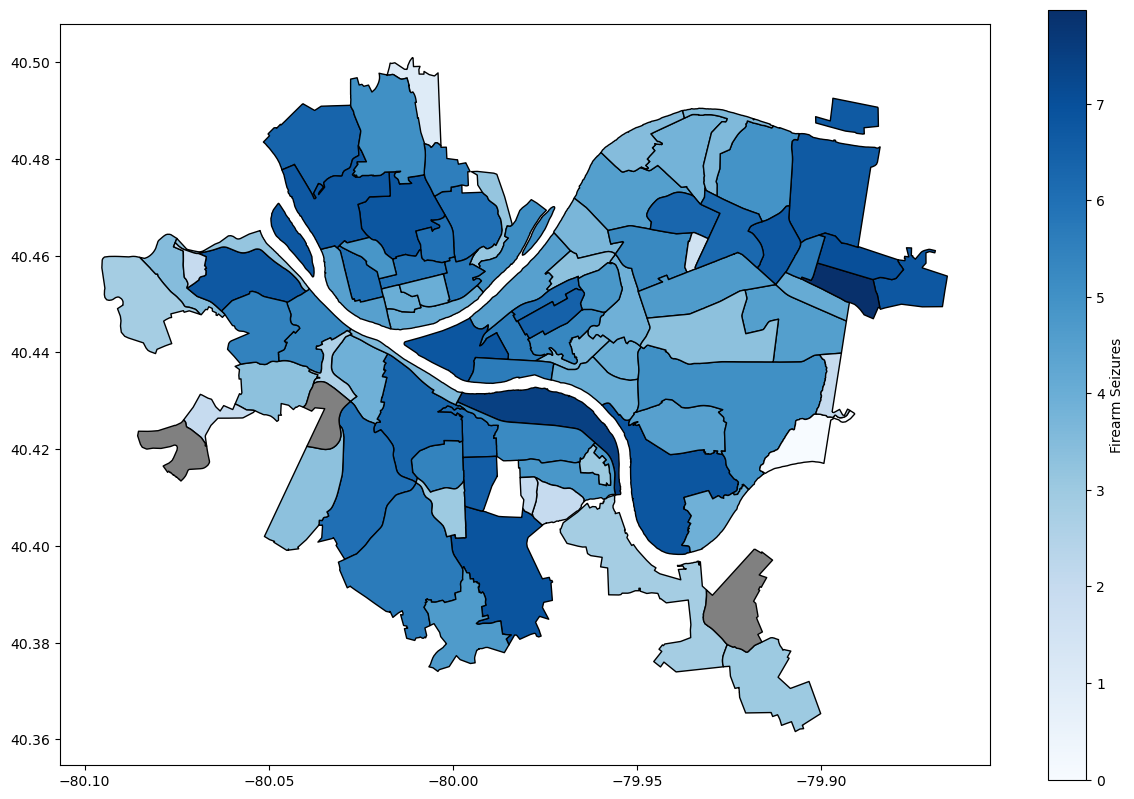

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

# import dataset
trees = pd.read_csv("Firearms.csv", engine ="python")
# filter to important info
num_fires = trees.groupby("neighborhood").count()["_id"]
#num_fires.sort_values(ascending=False)
num_fireslog = num_fires.apply(np.log2)

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# do the merge
trees_map = neighborhoods.merge(num_fireslog, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
trees_map[['hood','_id','geometry']].head()

# draw a choropleth map using data from the column named "number_of_trees"
trees_map.plot(column='_id', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Firearm Seizures"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "grey"} # set disctricts with no data to gray
               )

print(num_fires.sort_values(ascending = True))
plt.show()


# Fire Incidents

For this dataset, I tracked the count of the amount of instances of the neighborhood appearing in the dataset by first grouping the data by 'neighborhood' then counting each instance of that neighborhood in the 'fires' dataset. From here, I print out the top and bottom amounts of firearm seizures and a map that describes this data.

neighborhood
Mount Oliver Borough           7
Regent Square                  9
East Carnegie                 11
Mt. Oliver                    12
Ridgemont                     12
                            ... 
Hazelwood                    262
Squirrel Hill South          272
Central Business District    297
South Side Flats             304
Carrick                      318
Name: _id, Length: 91, dtype: int64


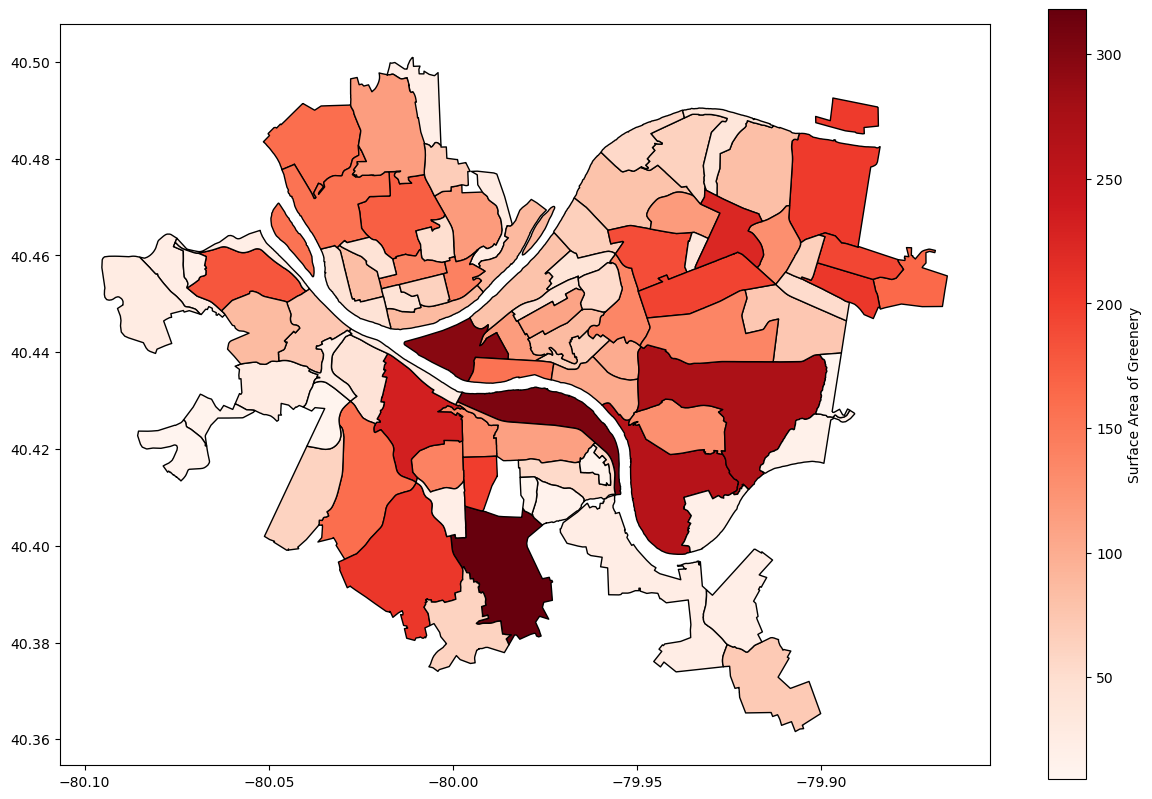

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

# import dataset
trees = pd.read_csv("Fire Incidents.csv", engine ="python")
# filter to important info
num_fires = trees.groupby("neighborhood").count()["_id"]
#num_fires.sort_values(ascending=False)

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# do the merge
trees_map = neighborhoods.merge(num_fires, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
trees_map[['hood','_id','geometry']].head()

# draw a choropleth map using data from the column named "number_of_trees"
trees_map.plot(column='_id', # set the data to be used for coloring
               cmap='Reds',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Surface Area of Greenery"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "black"} # set disctricts with no data to gray
               )

print(num_fires.sort_values(ascending = True))
plt.show()


# Combination of Sub-metrics

To combine all the sub-metrics, I have first re-expressed the data for each dataset as a percentile ranging from 0 to 1. To do this, I used the apply() function and created functions that subtracted each value in the dataset by the minimum value and then divided this value by the range. For the trees metric, since I want to most weight to go to the value with the least greenage, subtract 1 from every value. From here, I simply add each dataframe together, matched by the neighborhood column. This effectively weights each metric evenly to the total final metric. This total final metric ranges from 0 to 3 with the values closer to 3 being the worst. I have printed the highest and lowest values of this metric and created a geomap to show the geographic spread based on out metric.

neighborhood
Homewood South               2.587352
South Side Flats             2.425565
Carrick                      2.355808
Central Business District    2.187063
Hazelwood                    2.168208
                               ...   
Swisshelm Park               0.988353
Squirrel Hill South          0.979580
Regent Square                0.937275
Highland Park                0.796853
Mount Oliver Borough         0.523904
Length: 91, dtype: float64
metric


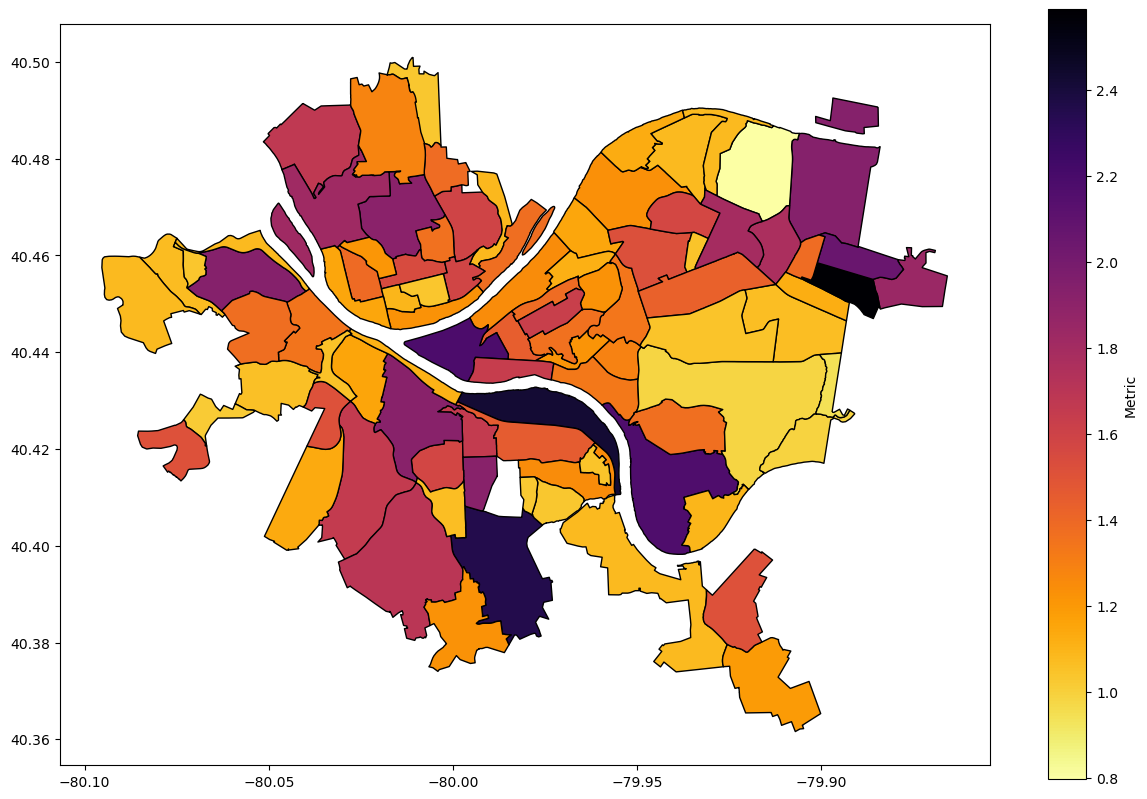

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

# Function to convert the raw data into a metric to combine with the other sets
# done as a percentage
def metricFunctionFirearms(x):
    return (x - num_firearms.min()) / (num_firearms.max() - num_firearms.min())
def metricFunctionFires(x):
    return (x - num_fires.min()) / (num_fires.max() - num_fires.min())
def metricFunctionTrees(x):
    return 1 - ((x-num_trees.min()) / (num_trees.max() - num_trees.min()))


firearms = pd.read_csv("Firearms.csv", engine ="python")
num_firearms = firearms.groupby("neighborhood").count()["_id"]
metricFirearms = num_firearms.apply(metricFunctionFirearms)


fires = pd.read_csv("Fire Incidents.csv", engine ="python")
num_fires = fires.groupby("neighborhood").count()["_id"]
metricFires = num_fires.apply(metricFunctionFires)


trees = pd.read_csv("trees.csv", engine ="python")
num_trees = trees.groupby("neighborhood").sum()['property_value_benefits_leaf_surface_area']
metricTrees = num_trees.apply(metricFunctionTrees)

final = (metricTrees.add(metricFires,fill_value = 0.5)).add(metricFirearms,fill_value = 0.5)
print(final.sort_values(ascending=False))
final.name = "metric"
print(final.name)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# do the merge
trees_map = neighborhoods.merge(final, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
trees_map[['hood',"metric",'geometry']].head()

# draw a choropleth map using data from the column named "number_of_trees"
trees_map.plot(column= "metric", # set the data to be used for coloring
               cmap='inferno_r',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Metric"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "black"} # set disctricts with no data to gray
               )
plt.show()


# Conclusions

By our metrics, we can conclude that the worst neighborhood in Pittsburgh is Homewood South with a metric score of 2.587352 out of 3. On the flip side, the best neigborhood in pittsburgh is Mount Oliver Borough with a metric score of 0.523904.

# Thank You!